<html> <h1> Pipeline ONLY </h1> </html>

![ML_Pipeline_Diagram](ML_Pipeline_Diagram.png)

<html> <h3> 0. Setup and Module Imports </h3> </html>

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

<html> <h2 style="color:#4EA72E;"> 1. Merge Ask and Bid Datasets </h2> </html>

<html> <h3 style="color:#4EA72E;"> Import Ask and Bid Datasets and Merge </h3> </html>

In [7]:
#Import Ask data
dataA = pd.read_csv('XAGUSD_5 Mins_Ask_2023.01.01_2023.06.30.csv')
#Import Bid Data
dataB = pd.read_csv('XAGUSD_5 Mins_Bid_2023.01.01_2023.06.30.csv')

<html> <h3 style="color:#4EA72E;"> Merge </h3> </html>

In [9]:
#Merge Ask & Bid Datasets
Combo_Data = dataB.merge(dataA, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')

#Display head of combined data set just to check
Combo_Data.head()

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820
3,2023.01.02 23:15:00,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940
4,2023.01.02 23:20:00,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044


<html> <h3 style="color:#4EA72E;"> Rename Columns </h3> </html>

In [11]:
#Rename the Columns to something more sensible
Combo_Data.columns = ['Time (UTC)', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

Combo_Data.head()

,Time (UTC),Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820
3,2023.01.02 23:15:00,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940
4,2023.01.02 23:20:00,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044


In [12]:
#Save the new combined data set to a new file
#The name of this file is contextual to the data - e.g. Silver Ask Bid
file_obj2 = open('Silver_ASK_BID_Combo_Data.csv', 'w')
Combo_Data.to_csv('Silver_ASK_BID_Combo_Data.csv', encoding='utf-8', index=False)
file_obj2.close()

In [13]:
#Clear Combo Data AND DataA/B
Combo_Data = []
DataA = []
DataB = []

In [14]:
#Import new combined data set
data = pd.read_csv('Silver_ASK_BID_Combo_Data.csv', low_memory=False, sep=',')

<html> <h2 style="color:#D86ECC;"> 2. Plot Price and Volume Charts </h2> </html>

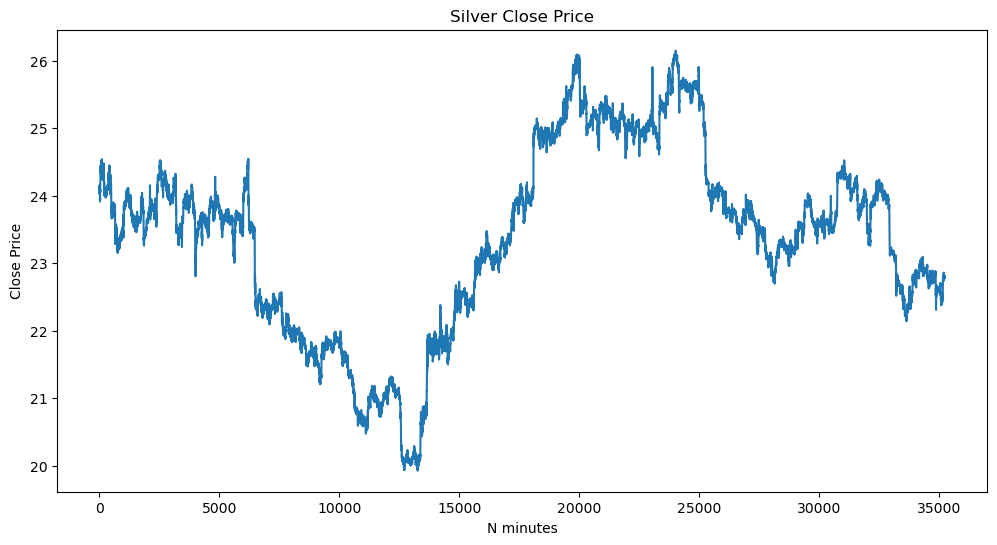

In [16]:
#Plot Ask Close Price Data
plt.figure(figsize=(12,6))
plt.plot(data['Close_Ask'])
plt.title('Silver Close Price')
plt.xlabel('N minutes')
plt.ylabel('Close Price')
plt.show()

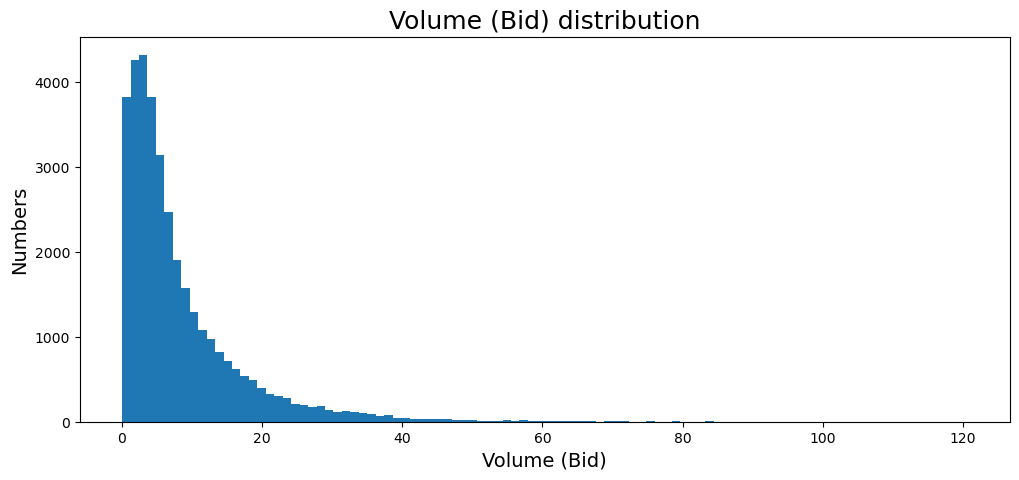

In [17]:
#Plot Bid Volume Data
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Bid'],bins=100)
plt.title('Volume (Bid) distribution', size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (Bid)',size=14);

### Calculate Deltas

In [19]:
# Delta of trading volumes (as well as the modulus of this delta) between Ask 
# and Bid volumes are added as additional parameters

data["Volume_Delta"] = data["Volume_Ask"] - data["Volume_Bid"]
data["Volume_Delta_abs"] = (data["Volume_Ask"] - data["Volume_Bid"]).abs()

In [20]:
#Calculate Deltas for Prices
data["Open_Delta"] = data["Open_Ask"]  - data["Open_Bid"]
data["High_Delta"] = data["High_Ask"]  - data["High_Bid"]
data["Low_Delta"]  = data["Low_Ask"]   - data["Low_Bid"]
data["Close_Delta"] = data["Close_Ask"] - data["Close_Bid"]

In [21]:
data.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
count,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000
mean,23.357365,23.374611,23.338437,23.357367,8.283187,23.387577,23.404824,23.368703,23.387501,35.095338,26.812151,26.908678,0.030212,0.030212,0.030266,0.030134
std,1.368781,1.368825,1.368926,1.368867,8.976407,1.368779,1.368797,1.368944,1.368861,39.024921,33.422609,33.344942,0.003245,0.003380,0.005014,0.003851
min,19.893000,19.914000,19.888000,19.893000,0.000000,19.923000,19.944000,19.918000,19.923000,0.000000,-48.791200,0.000000,0.011000,0.018000,0.001000,0.012000
25%,22.421750,22.440000,22.400000,22.421000,2.611050,22.452000,22.470000,22.430000,22.451000,9.467675,5.170550,5.237100,0.030000,0.030000,0.030000,0.030000
50%,23.560000,23.576000,23.543000,23.560000,5.331100,23.590000,23.607000,23.573000,23.590000,22.237450,14.907800,14.937300,0.030000,0.030000,0.030000,0.030000
75%,24.122000,24.144000,24.103000,24.122000,10.686275,24.153000,24.174000,24.133000,24.152000,46.639375,36.154925,36.159175,0.030000,0.030000,0.030000,0.030000
max,26.118000,26.123000,26.098000,26.118000,120.651700,26.148000,26.153000,26.128000,26.148000,365.632200,317.585800,317.585800,0.185000,0.222000,0.409000,0.309000


### Drop Time

In [23]:
data = data.drop(['Time (UTC)'],axis=1)

In [24]:
data.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510,0.0030,0.0030,0.066,0.066,0.066,0.066
1,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550,-0.6908,0.6908,0.030,0.058,0.030,0.049
2,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820,-0.0210,0.0210,0.049,0.050,0.050,0.050
3,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940,0.0000,0.0000,0.049,0.048,0.048,0.048
4,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044,0.0164,0.0164,0.048,0.049,0.047,0.050


### Create Y Columns

In [26]:
data['Y_High_Bid'] = data['High_Bid']
data['Y_Low_Ask'] = data['Low_Bid'] + data['Low_Delta']

In [27]:
#Removes the Ask Columns
#data2=data.drop(['Open_Ask','High_Ask','Low_Ask','Close_Ask'],axis=1)

### Split Data Set into X and y

In [29]:
#Seperate X and y data sets
#X is everything except the Y_High_Bid and Y_Low_Ask columns
data_X = data.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)
#y is just the Y_High_Bid and Y_Low_Ask columns
data_y = data[['Y_High_Bid', 'Y_Low_Ask']]

In [30]:
data_X.shape

(35220, 16)

In [31]:
data_y.shape

(35220, 2)

### Shift Data

In [33]:
data_y = data_y.shift(-1)

In [34]:
data_y.tail(5)

,Y_High_Bid,Y_Low_Ask
35215,22.751,22.775
35216,22.751,22.776
35217,22.761,22.774
35218,22.766,22.786
35219,NaN,NaN


In [35]:
data_y = data_y.dropna().reset_index(drop=True)

In [36]:
data_y.tail(5)

,Y_High_Bid,Y_Low_Ask
35214,22.752,22.771
35215,22.751,22.775
35216,22.751,22.776
35217,22.761,22.774
35218,22.766,22.786


In [37]:
data_X = data_X[:data_y.shape[0]]

In [38]:
print(data_X.shape, data_y.shape)

(35219, 16) (35219, 2)


Train Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.1, shuffle=False, stratify=None, random_state=101)

### Normalisation

In [42]:
volume_scaler = MinMaxScaler()
price_scaler = MinMaxScaler()

In [43]:
volume_columns = [5, 10]  # Because 'Volume_Bid' and 'Volume_Ask' are at positions 5 and 10
# Convert back to DataFrame to apply transformations, then convert back to NumPy arrays
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Apply transformations on DataFrame columns
X_train_df.iloc[:, volume_columns] = volume_scaler.fit_transform(X_train_df.iloc[:, volume_columns])
X_test_df.iloc[:, volume_columns] = volume_scaler.transform(X_test_df.iloc[:, volume_columns])

# Convert back to NumPy arrays
X_train = X_train_df.values
X_test = X_test_df.values

In [44]:
price_columns = list(set(range(X_train.shape[1])) - set(volume_columns))
X_train[:, price_columns] = X_train[:, price_columns] / 10
X_test[:, price_columns] = X_test[:, price_columns] / 10

In [45]:
y_train = y_train / 10
y_test = y_test / 10

In [46]:
data_length = len(data)
data_length

35220

In [47]:
#max_price = (train['High_Bid'] + train['High_Delta']).max()
#max_price

In [48]:
#min_price = train['Low_Bid'].min()
#min_price

In [49]:
#max_volume = max(max(train['Volume_Bid']), max(train[ 'Volume_Ask']))
#max_volume

In [50]:
#max_Delta = max(max(train[ 'Open_Delta']), max(train['High_Delta']), max(train['Low_Delta']), max(train['Close_Delta']))
#max_Delta

In [51]:
#max_Delta = round(max_Delta, 3)
#max_Delta

In [52]:
#min_Delta = min(min(train[ 'Open_Delta']), min(train['High_Delta']), min(train['Low_Delta']), min(train['Close_Delta']))
#min_Delta

In [53]:
#min_Delta = round(min_Delta, 3)
#min_Delta

In [54]:
#max_volume_Delta = train['Volume_Delta'].max()
#max_volume_Delta

In [55]:
#min_volume_Delta = train[ 'Volume_Delta'].min()
#min_volume_Delta

In [56]:
#max_volume_Delta_abs = train['Volume_Delta_abs'].max()
#max_volume_Delta_abs

In [57]:
#min_volume_Delta_abs = train['Volume_Delta_abs'].min()
#min_volume_Delta_abs

In [58]:
#data['Open_Bid'] = ( data['Open_Bid'] - min_price ) / (max_price-min_price)
#data['High_Bid']  = ( data['High_Bid']  - min_price ) / (max_price-min_price)
#data['Low_Bid']   = ( data['Low_Bid']   - min_price ) / (max_price-min_price)
#data['Close_Bid'] = ( data['Close_Bid'] - min_price ) / (max_price-min_price)
#data['Y_High_Bid'] = ( data['Y_High_Bid'] - min_price ) / (max_price-min_price)
#data['Y_Low_Ask']  = ( data['Y_Low_Ask']  - min_price ) / (max_price-min_price)

In [59]:
#data['Volume_Ask']  = data['Volume_Ask'] / max_volume
#data['Volume_Bid']  = data['Volume_Bid'] / max_volume

In [60]:
#data['Volume_Delta'] = ( data['Volume_Delta'] - min_volume_Delta ) / (max_volume_Delta-min_volume_Delta)

In [61]:
#data['Volume_Delta_abs']  = data['Volume_Delta_abs'] / max_volume_Delta_abs

In [62]:
#data['Open_Delta']  = ( max_Delta - data['Open_Delta'] )  / (max_Delta-min_Delta)
#data['High_Delta']  = ( max_Delta - data['High_Delta'] )  / (max_Delta-min_Delta)
#data['Low_Delta']   = ( max_Delta - data['Low_Delta'] )   / (max_Delta-min_Delta)
#data['Close_Delta'] = ( max_Delta - data['Close_Delta'] ) / (max_Delta-min_Delta)

In [63]:
# Save Normalised Data Set as a new file

file_obj1 = open('Silver_ASK_BID_Normalised_Data.csv', 'w')
data.to_csv('Silver_ASK_BID_Normalised_Data.csv', encoding='utf-8', index=False)
file_obj1.close()

### Create Numpys

In [65]:
# Create inputs Numpy

X_train = np.array(X_train) 

with np.printoptions(precision=4):
    print("X_train:")
    print(X_train[:2,:])  
    print('\n')
    print(X_train[-2:,:]) 

print("numpy size: = ", X_train.shape)
print("type: ", X_train.dtype) 

X_train:
[[2.4036e+00 2.4059e+00 2.4017e+00 2.4059e+00 3.4800e-02 6.7133e-01
  2.4125e+00 2.4083e+00 2.4125e+00 3.5100e-02 1.3318e-01 3.0000e-04
  6.6000e-03 6.6000e-03 6.6000e-03 6.6000e-03]
 [2.4064e+00 2.4130e+00 2.4064e+00 2.4092e+00 1.8458e-01 6.7004e-01
  2.4188e+00 2.4094e+00 2.4141e+00 1.1550e-01 1.3129e-01 6.9080e-02
  3.0000e-03 5.8000e-03 3.0000e-03 4.9000e-03]]


[[2.3674 2.3682 2.3664 2.3677 0.1027 0.6074 2.3712 2.3694 2.3707 0.3179
  0.139  0.2152 0.003  0.003  0.003  0.003 ]
 [2.3679 2.3693 2.3665 2.3693 0.2133 0.6082 2.3723 2.3695 2.3723 0.6202
  0.1443 0.4069 0.003  0.003  0.003  0.003 ]]
numpy size: =  (31697, 16)
type:  float64


In [66]:
# Create inputs Numpy

X_test = np.array(X_test) 

with np.printoptions(precision=4):
    print("X_test:")
    print(X_test[:2,:])  
    print('\n')
    print(X_test[-2:,:]) 

print("numpy size: = ", X_test.shape)
print("type: ", X_test.dtype) 

X_test:
[[2.3684 2.3688 2.3665 2.3667 0.2076 0.609  2.3718 2.3695 2.3697 0.6526
  0.1453 0.445  0.003  0.003  0.003  0.003 ]
 [2.3672 2.3709 2.3665 2.37   0.6097 0.6071 2.3739 2.3695 2.373  1.8517
  0.1671 1.242  0.003  0.003  0.003  0.003 ]]


[[2.2751 2.2751 2.2746 2.2746 0.0069 0.4591 2.2781 2.2776 2.2776 0.0421
  0.1341 0.0352 0.003  0.003  0.003  0.003 ]
 [2.2746 2.2761 2.2736 2.2756 0.0216 0.4583 2.2797 2.2774 2.2786 0.0684
  0.1344 0.0468 0.003  0.0036 0.0038 0.003 ]]
numpy size: =  (3522, 16)
type:  float64


In [67]:
# Create outputs Numpy

y_train = np.array(y_train) 

print("y_train:")
print(y_train[:3,:])  
print('\n')
print(y_train[-3:,:]) 

print("numpy size: = ", y_train.shape)
print("type: ", y_train.dtype) 

y_train:
[[2.413  2.4094]
 [2.4098 2.4022]
 [2.398  2.3986]]


[[2.3682 2.3694]
 [2.3693 2.3695]
 [2.3688 2.3695]]
numpy size: =  (31697, 2)
type:  float64


In [68]:
# Create outputs Numpy

y_test = np.array(y_test) 

print("y_test:")
print(y_test[:3,:])  
print('\n')
print(y_test[-3:,:]) 

print("numpy size: = ", y_test.shape)
print("type: ", y_test.dtype) 

y_test:
[[2.3709 2.3695]
 [2.371  2.3718]
 [2.3723 2.3726]]


[[2.2751 2.2776]
 [2.2761 2.2774]
 [2.2766 2.2786]]
numpy size: =  (3522, 2)
type:  float64


### Create 3D Tensor

#### 3D Tensor is being created but cannot be used with MLP as is it only accepts a 2D input.

In [71]:
from tqdm import tqdm

In [72]:
n = data_X.shape[0]
t=data_X.shape[1]
N=50

L_train = X_train.shape[0] - N
L_test = X_test.shape[0] - N

print('Size of a X_train three-dimensional inputs tensor: ',L_train,N,t)
print('Size of a X_test three-dimensional inputs tensor: ',L_test,N,t)

Size of a X_train three-dimensional inputs tensor:  31647 50 16
Size of a X_test three-dimensional inputs tensor:  3472 50 16


In [73]:
# create inputs zeros 3D tensors with 'float32'

X_train_3d = np.zeros((L_train, N, t))  # Shape (L_train, N, t)
X_test_3d = np.zeros((L_test, N, t))    # Shape (L_test, N, t)

In [74]:
# create a two-dimensional zeros vector of answers - normalised the High_Bid and Low_Ask prices DURING next 5 minutes

y_train_2d = np.zeros((L_train, 2))    # For 'High_Bid' and 'Low_Ask'
y_test_2d = np.zeros((L_test, 2))

In [75]:
# Populate the 3D tensors and target arrays for training data
for k in tqdm(range(L_train)):
    X_train_3d[k] = X_train[k:k+N]
    y_train_2d[k] = y_train[k+N-1]  # Target is at the end of the sequence

100%|██████████| 31647/31647 [00:00<00:00, 286286.13it/s]


In [76]:
# Populate the 3D tensors and target arrays for testing data
for k in tqdm(range(L_test)):
    X_test_3d[k] = X_test[k:k+N]
    y_test_2d[k] = y_test[k+N-1]

100%|██████████| 3472/3472 [00:00<00:00, 231501.84it/s]


In [77]:
# Display the shapes and sample data for verification
print("X_train_3d shape:", X_train_3d.shape)
print("y_train_2d shape:", y_train_2d.shape)
print("X_test_3d shape:", X_test_3d.shape)
print("y_test_2d shape:", y_test_2d.shape)

X_train_3d shape: (31647, 50, 16)
y_train_2d shape: (31647, 2)
X_test_3d shape: (3472, 50, 16)
y_test_2d shape: (3472, 2)


In [79]:
# Print sample data for inspection
with np.printoptions(precision=4):
    print("\nSample X_train_3d (first sequence):\n", X_train_3d[0])
    print("\nSample y_train_2d (first 5 targets):\n", y_train_seq[:5])
    print("\nSample X_test_3d (first sequence):\n", X_test_3d[0])
    print("\nSample y_test_2d (first 5 targets):\n", y_test_seq[:5])


Sample X_train_3d (first sequence):
 [[2.4036e+00 2.4059e+00 2.4017e+00 2.4059e+00 3.4800e-02 6.7133e-01
  2.4125e+00 2.4083e+00 2.4125e+00 3.5100e-02 1.3318e-01 3.0000e-04
  6.6000e-03 6.6000e-03 6.6000e-03 6.6000e-03]
 [2.4064e+00 2.4130e+00 2.4064e+00 2.4092e+00 1.8458e-01 6.7004e-01
  2.4188e+00 2.4094e+00 2.4141e+00 1.1550e-01 1.3129e-01 6.9080e-02
  3.0000e-03 5.8000e-03 3.0000e-03 4.9000e-03]
 [2.4094e+00 2.4098e+00 2.3972e+00 2.3977e+00 9.0300e-02 6.7791e-01
  2.4148e+00 2.4022e+00 2.4027e+00 8.8200e-02 1.3311e-01 2.1000e-03
  4.9000e-03 5.0000e-03 5.0000e-03 5.0000e-03]
 [2.3977e+00 2.3980e+00 2.3938e+00 2.3980e+00 8.9400e-02 6.5912e-01
  2.4028e+00 2.3986e+00 2.4028e+00 8.9400e-02 1.3317e-01 0.0000e+00
  4.9000e-03 4.8000e-03 4.8000e-03 4.8000e-03]
 [2.3978e+00 2.4024e+00 2.3976e+00 2.4023e+00 8.8800e-02 6.5912e-01
  2.4073e+00 2.4023e+00 2.4073e+00 9.0440e-02 1.3322e-01 1.6400e-03
  4.8000e-03 4.9000e-03 4.7000e-03 5.0000e-03]
 [2.4026e+00 2.4061e+00 2.4026e+00 2.4058e+00 7

NameError: name 'y_train_seq' is not defined